In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [2]:
# Display the files in the input directory
input_directory = r'C:\Users\lubna\OneDrive\Desktop\input'
for root, dirs, files in os.walk(input_directory):
    for file in files:
        print(os.path.join(root, file))

# Load the dataset
dataset_path = r"C:\Users\lubna\OneDrive\Desktop\IRIS.csv"
data = pd.read_csv(dataset_path)

In [3]:
# Display basic information about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [4]:
# Check for missing values
print(data.isnull().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [5]:
# Display the first few rows of the dataset
print(data.head())



   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


<Figure size 1000x600 with 0 Axes>

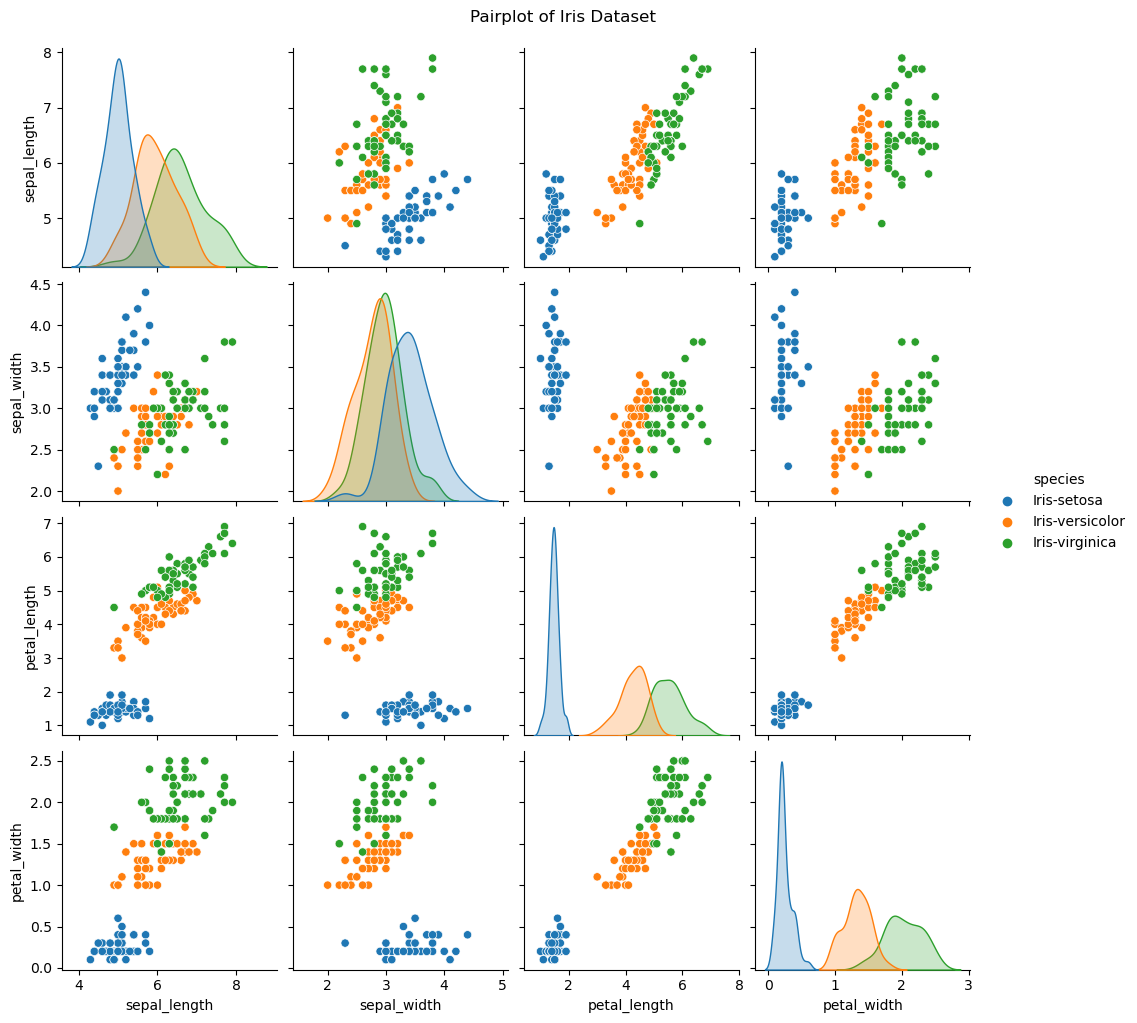

In [6]:
# Data visualization before training
plt.figure(figsize=(10, 6))
sns.pairplot(data, hue='species')
plt.suptitle("Pairplot of Iris Dataset", y=1.02)
plt.show()



In [7]:
# Define feature columns and target variable
X = data.drop(columns=['species'])
y = data['species']



In [8]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [9]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train models with cross-validation
svm_model = SVC(kernel='rbf', C=1, probability=True, random_state=42)
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Cross-validation for SVM
svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
print(f"SVM Cross-Validation Accuracy: {svm_cv_scores.mean():.4f} ± {svm_cv_scores.std():.4f}")

# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)
print(f"Decision Tree Cross-Validation Accuracy: {dt_cv_scores.mean():.4f} ± {dt_cv_scores.std():.4f}")

# Fit models on the entire training set
svm_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)

# Make predictions with both models
y_pred_svm_train = svm_model.predict(X_train_scaled)
y_pred_dt_train = dt_model.predict(X_train_scaled)

y_pred_svm_test = svm_model.predict(X_test_scaled)
y_pred_dt_test = dt_model.predict(X_test_scaled)

# Debug: Print the first few predictions
print("SVM Test Predictions:", y_pred_svm_test[:10])
print("Decision Tree Test Predictions:", y_pred_dt_test[:10])

# Calculate performance metrics for the test set
metrics_test = {
    "Model": ["Support Vector Machine", "Decision Tree"],
    "Accuracy": [accuracy_score(y_test, y_pred_svm_test), accuracy_score(y_test, y_pred_dt_test)],
    "Precision": [precision_score(y_test, y_pred_svm_test, average='macro'), precision_score(y_test, y_pred_dt_test, average='macro')],
    "Recall": [recall_score(y_test, y_pred_svm_test, average='macro'), recall_score(y_test, y_pred_dt_test, average='macro')],
    "F1 Score": [f1_score(y_test, y_pred_svm_test, average='macro'), f1_score(y_test, y_pred_dt_test, average='macro')]
}

metrics_test_df = pd.DataFrame(metrics_test)

SVM Cross-Validation Accuracy: 0.9667 ± 0.0312
Decision Tree Cross-Validation Accuracy: 0.9333 ± 0.0204
SVM Test Predictions: [0 2 1 1 0 1 0 0 2 1]
Decision Tree Test Predictions: [0 2 1 1 0 1 0 0 2 1]


In [10]:
from sklearn.model_selection import train_test_split, cross_val_score


In [11]:
# Initialize and train the models with cross-validation
svm_model = SVC(kernel='rbf', C=1, probability=True)  # Using RBF kernel and regularization
dt_model = DecisionTreeClassifier(max_depth=3, random_state=42)  # Adjusted parameter to prevent overfitting

# Cross-validation for SVM
svm_cv_scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
print(f"SVM Cross-Validation Accuracy: {svm_cv_scores.mean():.4f} ± {svm_cv_scores.std():.4f}")

# Cross-validation for Decision Tree
dt_cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)
print(f"Decision Tree Cross-Validation Accuracy: {dt_cv_scores.mean():.4f} ± {dt_cv_scores.std():.4f}")

# Fit models on the entire training set
svm_model.fit(X_train_scaled, y_train)
dt_model.fit(X_train_scaled, y_train)

# Make predictions with both models
y_pred_svm_train = svm_model.predict(X_train_scaled)
y_pred_dt_train = dt_model.predict(X_train_scaled)

y_pred_svm_test = svm_model.predict(X_test_scaled)
y_pred_dt_test = dt_model.predict(X_test_scaled)

# Debug: Print the first few predictions
print("SVM Test Predictions:", y_pred_svm_test[:10])
print("Decision Tree Test Predictions:", y_pred_dt_test[:10])

SVM Cross-Validation Accuracy: 0.9667 ± 0.0312
Decision Tree Cross-Validation Accuracy: 0.9333 ± 0.0204
SVM Test Predictions: [0 2 1 1 0 1 0 0 2 1]
Decision Tree Test Predictions: [0 2 1 1 0 1 0 0 2 1]


In [12]:
# Calculate performance metrics for the test set
metrics_test = {
    "Model": ["Support Vector Machine", "Decision Tree"],
    "Accuracy": [accuracy_score(y_test, y_pred_svm_test), accuracy_score(y_test, y_pred_dt_test)],
    "Precision": [precision_score(y_test, y_pred_svm_test, average='macro'), precision_score(y_test, y_pred_dt_test, average='macro')],
    "Recall": [recall_score(y_test, y_pred_svm_test, average='macro'), recall_score(y_test, y_pred_dt_test, average='macro')],
    "F1 Score": [f1_score(y_test, y_pred_svm_test, average='macro'), f1_score(y_test, y_pred_dt_test, average='macro')]
}

metrics_test_df = pd.DataFrame(metrics_test)



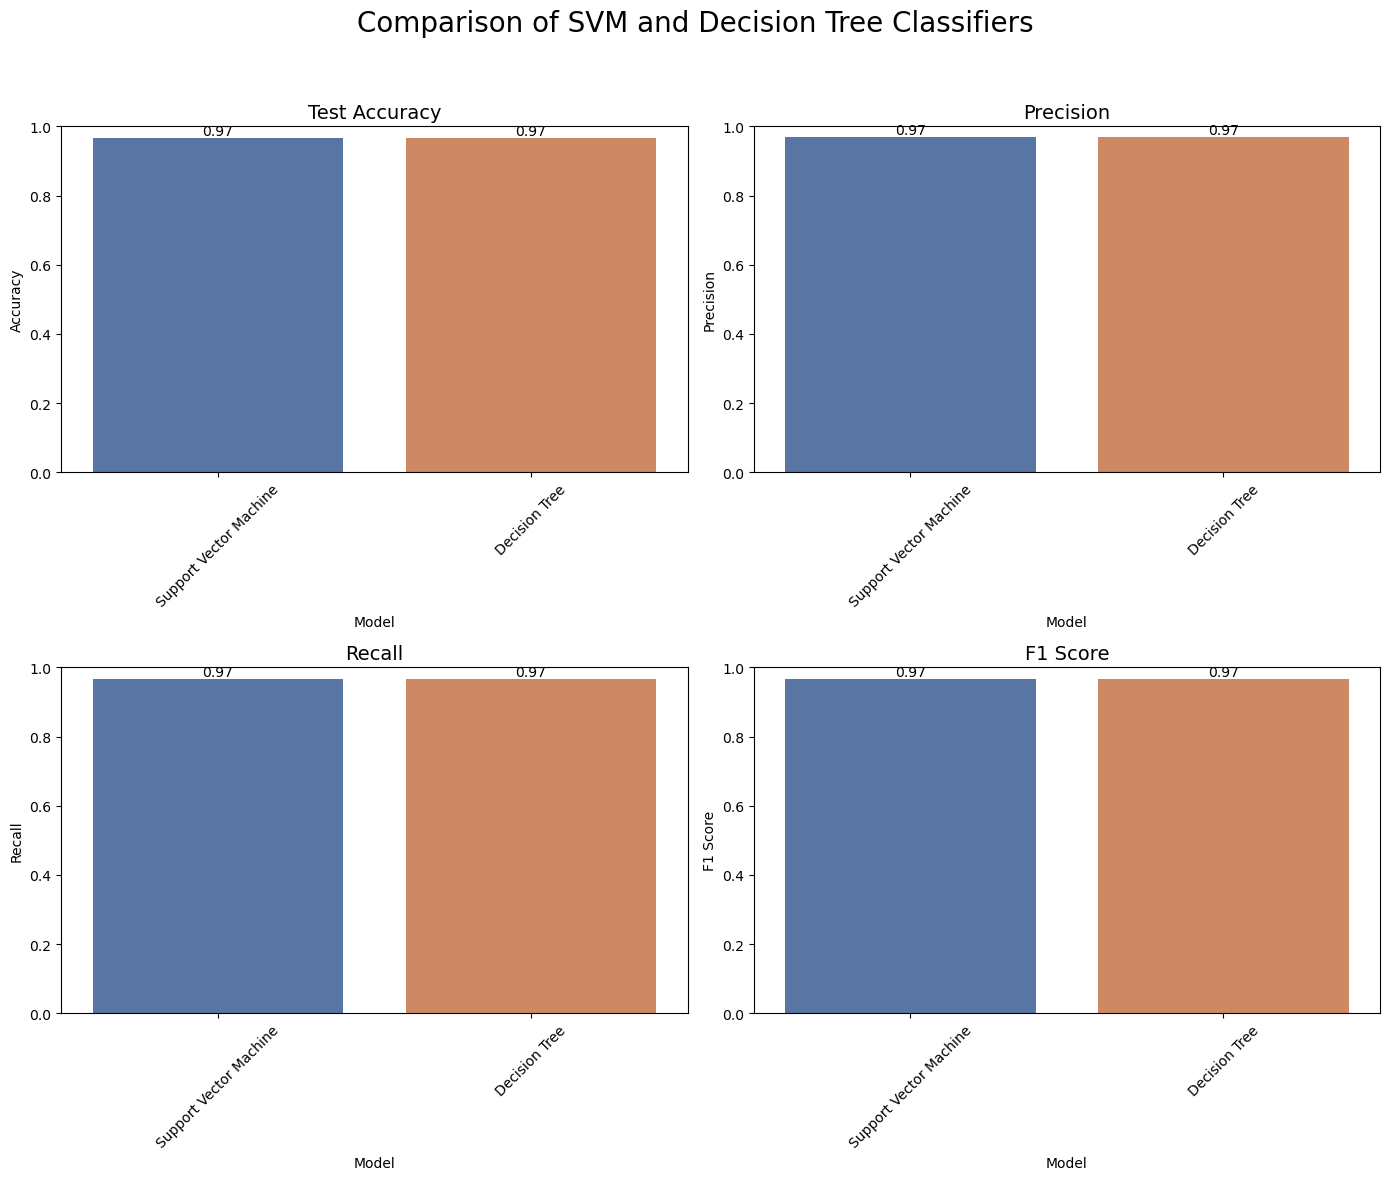

Test Set Metrics:
                    Model  Accuracy  Precision    Recall  F1 Score
0  Support Vector Machine  0.966667   0.969697  0.966667  0.966583
1           Decision Tree  0.966667   0.969697  0.966667  0.966583
Train Set Accuracy:
                    Model  Train Accuracy
0  Support Vector Machine        0.975000
1           Decision Tree        0.983333


In [13]:
# Calculate accuracy for the train set
accuracy_train = {
    "Model": ["Support Vector Machine", "Decision Tree"],
    "Train Accuracy": [accuracy_score(y_train, y_pred_svm_train), accuracy_score(y_train, y_pred_dt_train)]
}

accuracy_train_df = pd.DataFrame(accuracy_train)

# Plot performance metrics for the test set
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Comparison of SVM and Decision Tree Classifiers', fontsize=20)

# Plotting each metric
sns.barplot(x='Model', y='Accuracy', data=metrics_test_df, ax=axes[0, 0], palette='deep')
axes[0, 0].set_title('Test Accuracy', fontsize=14)
axes[0, 0].set_ylim(0, 1)

sns.barplot(x='Model', y='Precision', data=metrics_test_df, ax=axes[0, 1], palette='deep')
axes[0, 1].set_title('Precision', fontsize=14)
axes[0, 1].set_ylim(0, 1)

sns.barplot(x='Model', y='Recall', data=metrics_test_df, ax=axes[1, 0], palette='deep')
axes[1, 0].set_title('Recall', fontsize=14)
axes[1, 0].set_ylim(0, 1)

sns.barplot(x='Model', y='F1 Score', data=metrics_test_df, ax=axes[1, 1], palette='deep')
axes[1, 1].set_title('F1 Score', fontsize=14)
axes[1, 1].set_ylim(0, 1)

# Rotate x-axis labels and add value labels
for ax in axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)
    for container in ax.containers:
        ax.bar_label(container, fmt='%.2f')

# Adjust layout and display the plots
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Display the performance metrics for test set
print("Test Set Metrics:")
print(metrics_test_df)

# Display the accuracy for train set
print("Train Set Accuracy:")
print(accuracy_train_df)

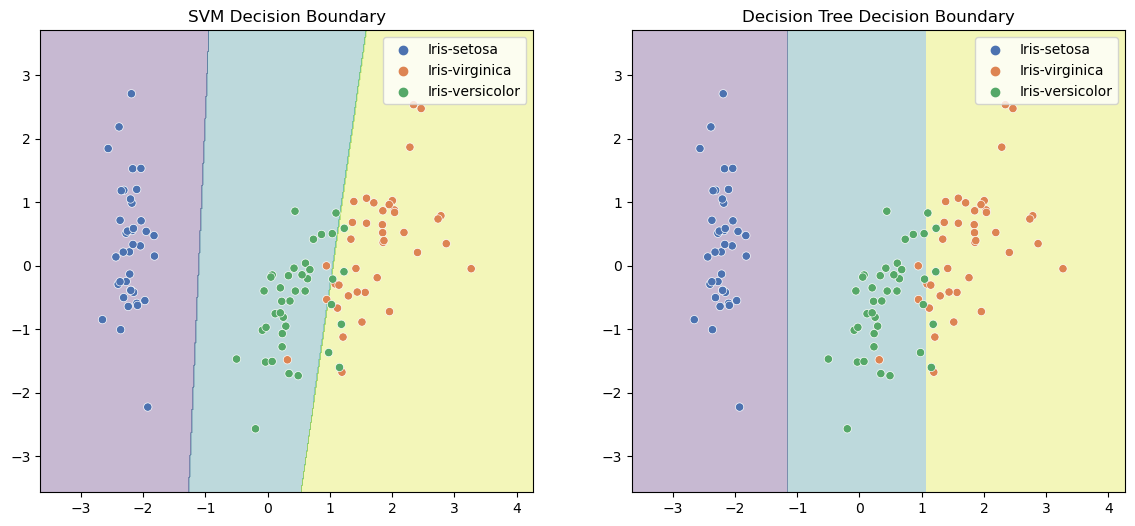

In [14]:
from sklearn.decomposition import PCA


# PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Fit models on PCA-transformed data
svm_model_pca = SVC(kernel='linear', probability=True)
dt_model_pca = DecisionTreeClassifier(max_depth=3, random_state=42)

svm_model_pca.fit(X_train_pca, y_train)
dt_model_pca.fit(X_train_pca, y_train)

# Plot decision boundaries for SVM
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
xx, yy = np.meshgrid(np.linspace(X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1, 500),
                     np.linspace(X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1, 500))
Z = svm_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=label_encoder.inverse_transform(y_train), palette='deep')
plt.title('SVM Decision Boundary')

# Plot decision boundaries for Decision Tree
plt.subplot(1, 2, 2)
Z = dt_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.3)
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=label_encoder.inverse_transform(y_train), palette='deep')
plt.title('Decision Tree Decision Boundary')

plt.show()